In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tw= pd.read_csv("/content/drive/MyDrive/CS 539 Final Project/Tweet data/tweets_cleaned.csv")
tw

,target,id,date,flag,user,text
0,0.0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da..."
1,0.0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0.0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0.0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0.0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."
...,...,...,...,...,...,...
1599995,1.0,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1.0,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1.0,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1.0,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
#Shuffle data randomly
tw = tw.sample(frac=1).reset_index(drop=True)
tw

,target,id,date,flag,user,text
0,1.0,1834779739,Mon May 18 04:10:37 PDT 2009,NO_QUERY,boomchocaloca,Good morning another day of frekin gay school....
1,0.0,2246013614,Fri Jun 19 16:58:16 PDT 2009,NO_QUERY,OscarValentino,Everyone says I'm concieted
2,1.0,1983553617,Sun May 31 13:22:44 PDT 2009,NO_QUERY,Desirization,Working on European History homework and tryin...
3,1.0,1966502848,Fri May 29 17:53:12 PDT 2009,NO_QUERY,slmann94,i love being right
4,0.0,2049173309,Fri Jun 05 16:25:21 PDT 2009,NO_QUERY,HeatherHunniee,Now crying
...,...,...,...,...,...,...
1599995,0.0,2218176312,Wed Jun 17 22:01:13 PDT 2009,NO_QUERY,Msdivine20,How about Pink Briefs with the butt cut out?
1599996,1.0,2049557084,Fri Jun 05 17:05:21 PDT 2009,NO_QUERY,caroldonada,seb-day seb-day seb-day seb-day seb-day seb-da...
1599997,0.0,1960857833,Fri May 29 08:36:45 PDT 2009,NO_QUERY,MKFlynn,I'm with ya.... doesn't follow me either
1599998,0.0,1983227678,Sun May 31 12:45:07 PDT 2009,NO_QUERY,TheOperaTonight,"I saw the Sweeney Todd preformance last night,..."


In [ ]:
X = tw['text']
y = tw['target']
print(X)
print(y)

0          Good morning another day of frekin gay school....
1                               Everyone says I'm concieted 
2          Working on European History homework and tryin...
3                                        i love being right 
4                                                Now crying 
                                 ...                        
1599995         How about Pink Briefs with the butt cut out?
1599996    seb-day seb-day seb-day seb-day seb-day seb-da...
1599997          I'm with ya....  doesn't  follow me either 
1599998    I saw the Sweeney Todd preformance last night,...
1599999    GOOD ONE JENSON!!!!!! WHOOP WHOOP WHA CAN I SA...
Name: text, Length: 1600000, dtype: object
0          1.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
1599995    0.0
1599996    1.0
1599997    0.0
1599998    0.0
1599999    1.0
Name: target, Length: 1600000, dtype: float64


In [ ]:
lengths = tw["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
tw.iloc[argmax]
print(lengths.max())

138


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  143  236   14]
 [   0    0    0 ...  183  438   19]
 [   0    0    0 ...  588   10    5]
 ...
 [   0    0    0 ...  236   14  477]
 [   0    0    0 ...   36 1113    6]
 [   0    0    0 ...  639 3067  189]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import os

checkpoint_path = "/content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


model = Sequential()
model.add(layers.Embedding(max_words, 128))
model.add(layers.LSTM(64,dropout=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
39997/40000 [============================>.] - ETA: 0s - loss: 0.4250 - accuracy: 0.8027
Epoch 1: val_accuracy improved from -inf to 0.81703, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 470s 12ms/step - loss: 0.4250 - accuracy: 0.8027 - val_loss: 0.4010 - val_accuracy: 0.8170
Epoch 2/10
40000/40000 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.8184
Epoch 2: val_accuracy improved from 0.81703 to 0.82135, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 459s 11ms/step - loss: 0.3989 - accuracy: 0.8184 - val_loss: 0.3934 - val_accuracy: 0.8213
Epoch 3/10
39997/40000 [============================>.] - ETA: 0s - loss: 0.3916 - accuracy: 0.8222
Epoch 3: val_accuracy improved from 0.82135 to 0.82247, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 454s 11ms/step - loss: 0.3916 - accuracy: 0.8222 - val_loss: 0.3926 - val_accuracy: 0.8225
Epoch 4/10
40000/40000 [==============================] - ETA: 0s - loss: 0.3880 - accuracy: 0.8243
Epoch 4: val_accuracy improved from 0.82247 to 0.82267, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 460s 12ms/step - loss: 0.3880 - accuracy: 0.8243 - val_loss: 0.3932 - val_accuracy: 0.8227
Epoch 5/10
40000/40000 [==============================] - ETA: 0s - loss: 0.3861 - accuracy: 0.8256
Epoch 5: val_accuracy improved from 0.82267 to 0.82319, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 455s 11ms/step - loss: 0.3861 - accuracy: 0.8256 - val_loss: 0.3913 - val_accuracy: 0.8232
Epoch 6/10
40000/40000 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.8263
Epoch 6: val_accuracy improved from 0.82319 to 0.82330, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 453s 11ms/step - loss: 0.3850 - accuracy: 0.8263 - val_loss: 0.3915 - val_accuracy: 0.8233
Epoch 7/10
39999/40000 [============================>.] - ETA: 0s - loss: 0.3844 - accuracy: 0.8265
Epoch 7: val_accuracy improved from 0.82330 to 0.82407, saving model to /content/drive/MyDrive/CS 539 Final Project/RNN/training_1/cp.ckpt


40000/40000 [==============================] - 454s 11ms/step - loss: 0.3844 - accuracy: 0.8265 - val_loss: 0.3935 - val_accuracy: 0.8241
Epoch 8/10
39999/40000 [============================>.] - ETA: 0s - loss: 0.3840 - accuracy: 0.8269
Epoch 8: val_accuracy did not improve from 0.82407
40000/40000 [==============================] - 446s 11ms/step - loss: 0.3840 - accuracy: 0.8269 - val_loss: 0.3932 - val_accuracy: 0.8236
Epoch 9/10
39997/40000 [============================>.] - ETA: 0s - loss: 0.3837 - accuracy: 0.8268
Epoch 9: val_accuracy did not improve from 0.82407
40000/40000 [==============================] - 444s 11ms/step - loss: 0.3837 - accuracy: 0.8269 - val_loss: 0.3963 - val_accuracy: 0.8238
Epoch 10/10
40000/40000 [==============================] - ETA: 0s - loss: 0.3838 - accuracy: 0.8269
Epoch 10: val_accuracy did not improve from 0.82407
40000/40000 [==============================] - 442s 11ms/step - loss: 0.3838 - accuracy: 0.8269 - val_loss: 0.4000 - val_accuracy: 

In [ ]:
import joblib
filename = "/content/drive/MyDrive/CS 539 Final Project/RNN/training_1/rnn.joblib"
joblib.dump(LRmodel, filename)

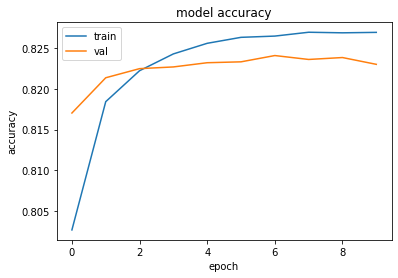

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

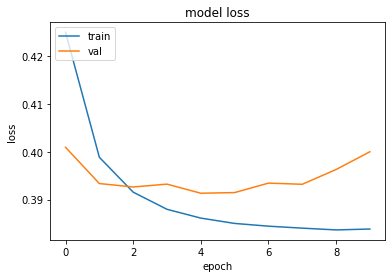

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)